<a href="https://colab.research.google.com/github/WandersonClayton/data_analysis/blob/main/image_compression_using_fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

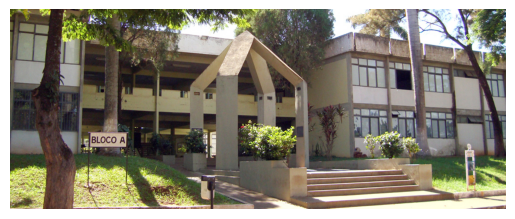

In [43]:
# Carregue a imagem usando o OpenCV
image = cv2.imread('/content/UEMG_Ituiutaba.jpg')

# Converta a imagem para o espaço de cores RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_rgb = image_rgb.astype(np.float32) / 255

#Exiba a imagem usando a biblioteca Matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [34]:
fourier = np.fft.fft2(image)

In [35]:
fourier_shifted = np.fft.fftshift(fourier)

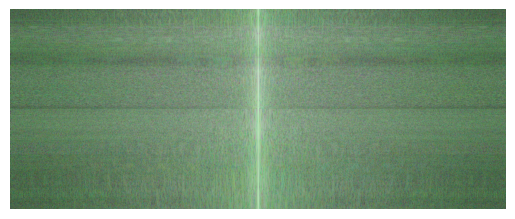

In [36]:
spectrum = np.log(1 + np.abs(fourier_shifted))

# Normalizar os valores do espectro para o intervalo [0, 1]
spectrum_normalized = (spectrum - np.min(spectrum)) / (np.max(spectrum) - np.min(spectrum))

# Exiba o espectro de frequência usando a biblioteca Matplotlib
plt.imshow(spectrum_normalized, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()


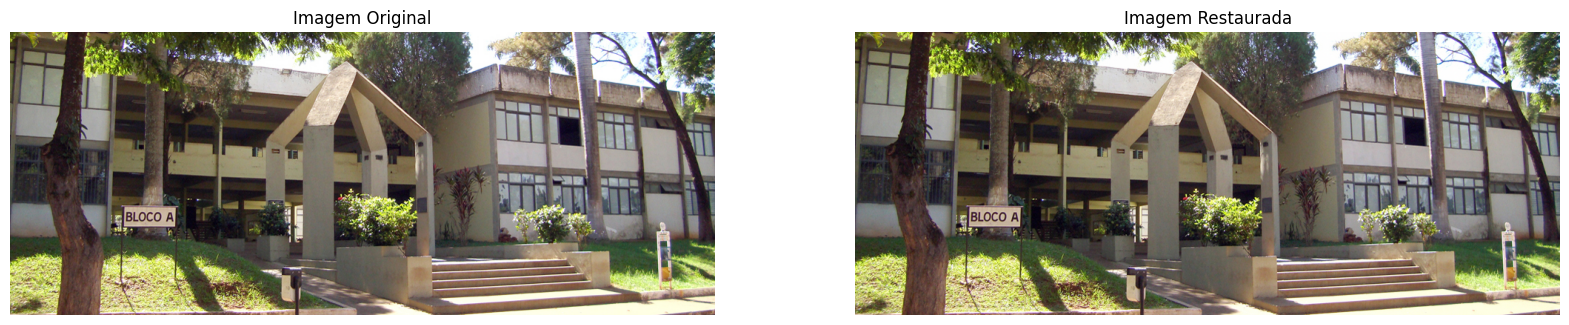

In [54]:
# Calcule a Transformada Inversa de Fourier
image_restored = np.fft.ifft2(fourier)

# Normalize os valores dos pixels para o intervalo [0, 255]
image_restored = np.abs(image_restored)
image_restored = np.uint8(image_restored)

image_restored = cv2.cvtColor(image_restored, cv2.COLOR_BGR2RGB)

# Exiba a imagem original e a imagem restaurada
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image_rgb)
axs[0].axis('off')
axs[0].set_title('Imagem Original')
axs[1].imshow(image_restored)
axs[1].axis('off')
axs[1].set_title('Imagem Restaurada')
plt.show()

In [37]:
#